In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('1. filtered_df.csv')
df.index = df['Unnamed: 0']
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,row,column,lat_min,lat_max,lon_min,lon_max,nature,entartainment,transports,art,sport,tourism,security,accessibility
Unnamed: 0,,,,,,,,,,,,,,
R1C36,1.0,36.0,45.000004,45.010004,12.460000,12.475,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1C37,1.0,37.0,45.000004,45.010004,12.445000,12.460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1C38,1.0,38.0,45.000004,45.010004,12.430000,12.445,54.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
R1C39,1.0,39.0,45.000004,45.010004,12.415000,12.430,46.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0
R1C40,1.0,40.0,45.000004,45.010004,12.400000,12.415,17.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R100C96,100.0,96.0,45.989998,45.999998,11.560000,11.575,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
R100C97,100.0,97.0,45.989998,45.999998,11.545000,11.560,17.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
R100C98,100.0,98.0,45.989998,45.999998,11.530000,11.545,182.0,0.0,12.0,0.0,0.0,3.0,0.0,0.0


In [29]:
# initialize the visualization matrix
viz_matrix = np.zeros([int(df.row.max()), int(df.column.max())])

In [30]:
values = df.iloc[:, 6:].sum(axis = 1).to_list()
rows = df.row.to_list()
columns = df.column.to_list()

In [31]:
for value, row, column in zip(values, rows, columns):
    viz_matrix[int(row) - 1, int(column) - 1] = value

In [32]:
# normalization
viz_matrix_normalized = (viz_matrix - viz_matrix.mean()) /viz_matrix.std()

# remove outliers
normalization_intensity = 0.01
low, high = np.percentile(viz_matrix_normalized, normalization_intensity * 100), np.percentile(viz_matrix_normalized, (1 - normalization_intensity) * 100)

viz_matrix_normalized = np.where(viz_matrix_normalized < low, low, viz_matrix_normalized)
viz_matrix_normalized = np.where(viz_matrix_normalized > high, high, viz_matrix_normalized)

<AxesSubplot:>

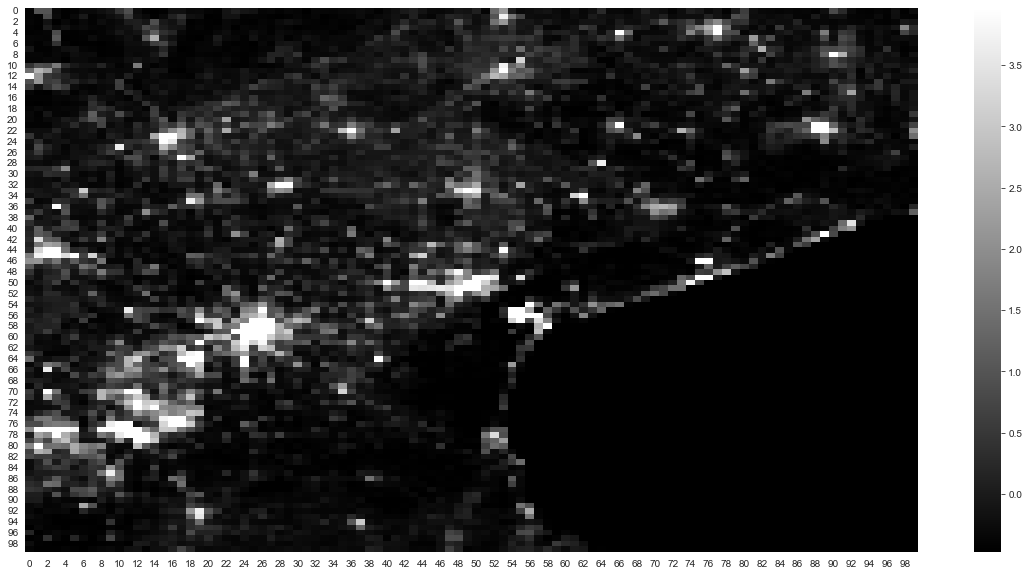

In [33]:
# plotting
fig, ax = plt.subplots(figsize=(20,10))

cmap = sns.cubehelix_palette(light = 0,
                             dark = 1,
                             hue = 0,
                             as_cmap=True)

sns.heatmap(np.rot90(viz_matrix_normalized, k = 2), cmap = cmap)